# Basic Image Processing(4)

---


## 1.[영상분할](#section1)
Image Segmentation이란 영상을 구성성분 또는 물체별로 나누는 작업이다. 흔히 3차원 공간에 존재하는 물리적 대상의 경계선 또는 경계면을 파악하는 것이 영상분할의 목적이다.



---

## 픽셀기반방법
픽셀기반 방법이란 Histogram을 이용해 픽셀들의 분포를 확인 후,Thresholding을 설정하여 픽셀 단위 연산을 통해 픽셀별로 나누는 방식이다.
- 히스토그램을 이용해서 분포를 파악하고 임계값을 설정(P-타일법)
    - 영상의 히스토그램을 그려서 분포를 파악하고 영상을 잘 분할할 수 있는 곳에 임계값을 설정한다. 일반적으로 임계값은 쌍봉선의 가장 낮은값을 기준으로 설정하거나 또는 영상물이 차지하고 있는 면적의 비율을 알고있는 경우에 히스토그램에서 그 면적 비율 P%점을 임계값으로 설정
    
<img src="./images/day4/histo.PNG" width = "600" height = "600">
<img src="./images/day4/ptile.PNG" width = "800" height = "800">    

    
    
- 알고리즘을 이용한 방법(Mode,Otsu)
    - Mode의 방법이나 Otsu의 방법은 알고리즘을 이용해서 가장 최적으로 영상을 분할을 어떻게 할 것인지에 대한 내용이다. Otsu는 기존에 살펴봤던 내용이지만, 잠깐 언급을 하자면 Random으로 임계값을 설정하고 설정한 임계값을 기준으로 Group을 나눈다. 나눈 그룹에서 픽셀값의 분산을 계산한후 분산의 값이 가장 낮게 분할되는 지점을 임계값으로 설정하고 영상을 분할한다. 
    


   
   
- 전역적(Global) , 지역적(Local) 임계값 처리
    - 일반적으로 앞서서 살펴본 임계값을 이용해서 분할을 진행하는 경우는 전역적 임계값처리에 해당한다. 하지만 조명이나 특정 잡음으로 인해 문제가 되는 경우 동일한 임계값(Global Thresholding)을 설정하게 되면 문제가 발생한다. 따라서 전체 영역을 여러개로 나누고 각각의 영역에 대하여 적절한 임계값을 설정하는 경우 매우 좋은 결과를 보인다.
    
    - Local Threshold는 영상을 여러개로 분할한 이후에 각각의 영상에 대해서 임계값을 정하고 영상을 분할하는 방법이다. 
    

<img src="./images/day4/globallocal.PNG" width = "800" height = "800">


- Original에 대해서 Global Threshold를 통해서 영상을 분할하게 될경우에 살짝 명암진부분이 아에 검정색으로 분할되어 왼쪽부분은 전혀 알수없는 부분이 되었다. 하지만 Lcal Thresholding을 통해서 이 문제를 해결할 수 있다. 
    
    
    
<img src="./images/day4/local.PNG" width = "800" height = "800">
 
 
[예제코드](#section3) 

--- 
    


<a id='section14'></a>

## Edge 기반 방법


Edge를 추출하는 필터등을 사용하여 영상으로부터 경계를 추출하고 Edge를 기준으로 물체와 배경을 Segmentation하는 기법을 말한다. Edge기반 방식은 점과 영역을 분할할 때 엣지가 중요한 특징이 된다. 복잡하지 않으면서도 효과가 좋기 때문에 영상Segmentation에서 많이 사용된다.


하지만 잡읍이 있거나 부분적으로 가려지는 현상이 발생하면 성능이 떨어지는 문제가 있다. 


Segmentation 과정은 크게 3단계를 거친다.


1. 엣지 검출 - 엣지에 있는 픽셀(Edge)를 찾아내는 과정
    - Original image에 대해서 Edge Filter를 이용해서 Edge를 detect한다. 
2. Segmentation에 필요없는 엣지를 제거
    - 비최대 억제의 방법으로 필요없는 엣지를 제거하여 엣지만 남기고 나머지는 제거를한다. 
3. 엣지를 기준으로 Segmentation
    - 남겨진 엣지를 기준으로 Segmentation을 진행한다.


<img src="./images/day4/edge기반.PNG" width = "800" height = "800">


[예제코드](#section4)


---



<a id='section15'></a>

## 영역기반방법
픽셀기반의 방법과 Edge기반의 Segmenation기법들은 영상안에 Noise가있거나, 명확하게 물체의 명암이 구별되지 않을 경우에 원하는 결과를 얻지 못한다는 단점이 있다. 따라서 나온것이 바로 영역 기반방법이다. 

<img src="./images/day4/영역기반도입.PNG" width = "800" height = "800">

영역기반의 방법은 기본적으로 영역의 동질성(Homogeneity)에 기반하고 있기 때문에 다른 방법보다 의미있는 영역으로 나누는데 적합하다. 영역기반의 방법은 동질성을 규정하는 Rule은 어떻게 정의할것인가가 관건이 된다.

- Region Growing
- Region Merging
- Region Splitting
- Split and Merge
- Watershed
- K-means
- Meanshift


등등의 방법론들이 있다.



---




## Region Growing
Gegion Growing방법은 기준 픽셀(seed)를 정하고 기준 픽셀과 비슷한 속성(명암,Texture,Color)을 갖는 픽셀로 영역을 확장하여 더 이상 같은 속성을 갖는 것들이 없으면 확장을 마치는 방식이다. 

<img src="./images/day4/growing1.PNG" width = "800" height = "800">

Region Growing을 할 때 보통 Seed를 정하는 방식은 3가지 방식을 사용한다.


1. 사용자가 Seed위치를 가정
2. 모든 픽셀을 Seed라고 가정 
3. 무작위로 Seed위치를 가정 


<img src="./images/day4/growing2.png" width = "800" height = "800">


번개의 사진을 예를 들어서 보면 번개를 찾고 배경과 Segementation을 진행하고 싶을 때 흑백 영상의 밝기는 0부터 255까지 분포하고 있기 때문에 밝은 영역만 연결하고 싶다면 Seed 값을 255로 설정하여 영역을 연결한다. Thresholding값을 설정하여 영역을 점점 확대 시키면 아래그림처럼 된다. 임계값을 어떻게 선택하냐에 따라서 달라지기도 한다.


<img src="./images/day4/growing3.PNG" width = "800" height = "800">


[예제코드](#section5)

---



<a id='section16'></a>

## Region Merging
비슷한 속성을 결합시켜 동일한 Label을 달아주는 방식 Region Merging은 어떤 경우에는 매 픽셀단위가 될 수 있으며, 일반적으로 심하게 나뉜 영역(OverSegmentation Region)을 시작점으로 하며, 일반적으로 아래와 같은 과정을 거친다.

<img src="./images/day4/merge1.PNG" width = "600" height = "600">

1. 인접영역을 정한다.
2. 비슷한 속성인지 아닌지를 판단할 수 있는 통계적인 방법을 적용하여 비교한다.
3. 같은 객체라고 판단이 되면 합친 이 후 다시 통계를 갱신한다.
4. 더 이상 합칠 것이 없을 때 까지 위 과정을 반복한다. 


<img src="./images/day4/merge2.PNG" width = "600" height = "600">

---



## Region Splitting

<img src="./images/day4/splitting1.PNG" width = "600" height = "600">


Region Splitting은 Merging과는 정반대의 개념으로 그럼 전체와 같은 큰 영역을 속성이 일정한 기준에서 쪼개면서 세분화된 영역을 나누는 방식을 사용한다. 대표적인 방법으로 Quad-Tree Splitting방식을 많이 이용한다.


큰 영역을 4개의 영역으로 나누고 다시 영역을 검토하여 추가로 나눠야할 것인지 결정한다. Region Splitting방식에서는 해당 영역에서 통계적 일정한 기준을 설정하고, 기준값이 미리 정한 임계 범위를 초과하게 되면 영역을 분할한다.
<img src="./images/day4/splitting2.PNG" width = "600" height = "600">

위의 이미지는 Segmentation이 잘된 case는 아님.
인접한 부분끼리 비슷한 부분이 나올 수 있으멩도 Splitting 방식에서는 Splitting원리에 의해 같은 속성을 갖는 부분도 다른 꼬리표가 붙게 된다.

[예제코드](#section6)

---



<a id='section17'></a>

## Split and Merge


Splitting 방식만으로 원하는 결과를 얻기 어렵기 때문에 동일한 열을 다시 합쳐주는 과정을 거쳐야한다. Quad-Tree Splitting방식을 사용하면 Over-Segmentation이 일어난다. 때문에 다시 합쳐주는 Merge과정을 거치는 것이 Split&Merge방법이다.


<img src="./images/day4/splitandmerge.PNG" width = "600" height = "600">

---



## Watershed

<img src="./images/day4/water1.PNG" width = "500" height = "500">



1. Watershed : 산등성이나 능선처럼 비가 내리면 양쪽으로 흘러 내리는 경계에 해당(위 이미지에서 빨간부분)
2. Catchment Basin : 물이 흘러 모이는 집수구역에 해당(위 이미지에서 파란색부분)

Watershed는 기본적으로 영역을 구분해주는 역할을 하기 때문에 Watershed만 구하면 영상을 Segmentation할 수 있게 된다. 

<img src="./images/day4/water2.PNG" width = "800" height = "800">


그중 Flooding 알고리즘에 대해서 간략하게 설명하면, Catchment Basin을 시작점으로 영역을 합친다. 영역을 합치다가 다른 Catchment Basin으로부터 영역이 합쳐진것과 마주치게 되면 그것을 Watershed로 설정하는 것이 Flooding알고리즘이다. 


<img src="./images/day4/water3.PNG" width = "800" height = "800">


Watershed 알고리즘을 이용하면 동전을 분할하고 Label을 달 수 있다.


[예제코드](#section7)


<a id='section17'></a>

## Whatershed - (Marker-Controlled Watershed Segmentation)
Over Segmentation을 피하기 위한 방법으로 마커(Marker)를 사용하여 Segmentation될 영역을 미리 지정하는 방식이다. 마커의 지정은 수동이나 자동으로 가능하며, 보통은 최종적으로 Segmentation이 되는 영역의 수와 Marker의 수가 동일하다.


<img src="./images/day4/marker.PNG" width = "800" height = "800">

---



### K-means Clustering
K-means Clustering은 Label 값이 주어지지 않았을 때 주어진 데이터의 특성을 가지고 각 각에 군집(Label)을 부여하는 알고리즘이다. 이미지 데이터에서는 3차원 공간에 떠있는 색깔이 비슷할수록 가까이 위치할 것이라는 가정하에 이러한 성질을 이용하여 분할을 수행한다.  
<img src="./images/day4/kmean.PNG" width = "800" height = "800">

K-means 클러스터링은 n개의 중심점을 찍은후에 각 점간의 거리합이 가장 최소화 되는 중심점 n의 위치를 찾고 이 중심점에서 가까운 점들을 중심점으로 묶는 알고리즘이다.

<img src="./images/day4/kmeans.PNG" width = "800" height = "800">


1. 군집의 개수를 정한다.
2. 임의로 정한 군집으로 부터 가까운 것 끼리 군집을 생성한다.
3. 각 군집에서 새로운 중심을 결정한다.
4. 변경한 중심이 이전보다 거리가 덜 가깝다면 그 군집으로 결정하고 그렇지 않으면 위의 과정을 반복한다.

<img src="./images/day4/kmeans2.PNG" width = "800" height = "800">


[예제코드](#section8)



---


<a id='section18'></a>

## 민시프트(Mean Shift)
Mean Shift 알고르짐은 데이터 집합의 밀도분포(특징점,코너,색상)를 기반으로 관심영역(ROI)객체를 고속으로 추적하거나 분할하는 알고리즘이다.
<img src="./images/day4/meanshift.PNG" width = "800" height = "800">


Means Shift를 이용하여 데이터들이 가장 밀집된 피크(Peak)점을 찾는다고 하자. Mean Shift의 탐색반경을 r이라 했을때, Mean Shift알고리즘은 다음과 같다.


<img src="./images/day4/meanshift2.png" width = "800" height = "800">



1. 현재 위치에서 반경 r이내에 들어오는 데이터들을 구한다. $(x1,y1),(x2,y2),(x3,y3),...,(xn,yn)$
2. 이들의 무게중심의 좌표($sum(xi/n),sum(yi/n))$로 현재위치를 이동시킨다.
3. 1~2 과정을 진행했을때 위치변화가 거의 없을 때 까지, 즉 수렴할 때까지 반복한다. 




<img src="./images/day4/meanshift3.PNG" width = "800" height = "800">


[예제코드](#section9)

---



<a id='section19'></a>


## 2.[이진영상처리](#section2)
### Morphology
영상형태학은 영상내의 원형,다각형,자유형상,내부의 홀을 가진 물체 홀의 크기등과 같은 물체구조에 관한 연구를 말한다. 이런 영상형태처리 연산은 물체의 내재된 구조를 명확히 하는데 이용된다.

1) 침식과 팽창
2) 제거채움
3) 외곽선추출
4) 세선화
5) 골격화

---




### 2.1 침식(Erosion)과 팽창(Dilation)
- 침식
    - 침식연산은 배경에 대해 물체의 크기를 축소시킨다.
    - 침식연산은 주로 물체의 배경 사이의 스파이크 잡음이나 전체 영상에서 아주 작은 물체를 제거하거나 전체영상에서 배경확장에 따른 물체를 축소하는데 사용된다.
    - 침식연산은 필터연산을 한 합이 9가 되지 않는다면 0으로 값을 넣는다. 이진영상에서 침식연산을 수행할 때 흰색 물체는 크기가 축소된다. 아주 작은 구조물 즉 크기가 한 픽셀인 물체는 침식과정을 거치게되면 없어진다.

<img src="./images/day4/팽창.PNG" width = "800" height = "800">


- 팽창
    - 팽창은 침식연산의 반대로서 균일하게 물체의 크기를 확장한다.
    - 팽창연산은 물체 안에 홀과 같은 빈공간을 메우는 역할을 하거나 서로 짧은 거리만큼 떨어져있는 영역을 연결시키는데 사용된다. 
    - 팽창연산은 필터연산을 한 합이 0보다 크다면 1로 값을 넣는다. 이 연산을 계속 반복하면 흰 물체는 계속 팽창하여 결국 영상 전체를 가득 채운다.
    
<img src="./images/day4/침식.PNG" width = "800" height = "800">


[예제코드](#section10)

--- 


<a id='section20'></a>


### 2.2 제거(Opening)와 채움(Closing)
- 제거(Opening)
    - 제거연산은 침식연산을 한 이후에 팽창연산을 바로 하는 연산이다.
    - 침식연산을 하게 되면 원 영상의 크기를 잃어버린다는 단점을 가지고 있지만 제거 연산은 침식 연산으로 미세한 잡음을 제거하고 다시 팽창연산을 수행함으로써 원 영상의 크기를 유지할 수 있다.


<img src="./images/day4/제거.PNG" width = "800" height = "800">
    
    
<img src="./images/day4/제거2.PNG" width = "800" height = "800">    

- 채움(Closing)
    - 채움연산은 제거연산의 반대로 팽창연산을 한 이후에 침식연산을 한다. 
    - 채움연산은 팽창연산으로 물체의 확장을 수행하여 빈곳을 메꾼 후 침식연산으로 다시 축소연산을 하여 원영상의 크기를 유지한다. 
    
    
<img src="./images/day4/채움.PNG" width = "800" height = "800">

    

<img src="./images/day4/채음2.PNG" width = "800" height = "800">


[예제코드](#section11)
    
---


<a id='section21'></a>


### 2.3 외곽선 추출
- 외곽선 추출은 아주 간단하게 침식연산을 통해서 구할 수 있다. 침식연산을 통해 구한 외곽선 추출연산은 한 픽셀두께의 외곽선을 생성하며 보통 에지검출 연산보다 영상잡음에 덜 민감하다.

    - 1) 외곽선 추출 연산은 먼저 영상에 침식연산을 적용한다.
    - 2) 침식 영상에 초기 영상을 뺀다.
    - 영상처리에서는 물체의 크기, 모양, 방향을 측정하기 위해 특징 추출 단계에서 물체의 외곽선을 이용한다.
    
    
    [이미지]


<img src="./images/day4/외곽선추출.PNG" width = "800" height = "800">

[예제코드](#section12)
    
---


<a id='section22'></a>

---


### 2.4 세선화(Thining)
- 세선화의 기본적인 개념은 두꺼운 선을 최 외곽으로부터 한 픽셀씩 벗겨 나가면서 마지막에 남는 선 성분을 추출하는 것이다. 
- 세선화의 결과에서 도형의 결합관계의 특징이 구해지므로, 글씨나 도면등에서 선의 구조를 설명할 때 사용한다.
    - 세선화는 다음과 같은 조건이 존재한다.  
        - 한픽셀의 두께영역으로 되어 있어야한다.
        - 영역의 단면의 중심에 위치해야 한다.
        - 세선을 이루고 있는 픽셀들은 서로 연결되어 있어야 한다.
        
    - 세선화 과정은 다음과 같다.
        - 바꾸고자 하는 픽셀 주위에 흰색 픽셀이 1개 존재해야한다.
        - 주변 픽셀에서 검정픽셀의 개수는 2개~6개가 아니면 검정색으로 바꾼다.
        - (오른쪽,위,왼쪽) 의 곱이 0이면 검정색
        - (위,왼쪽,아래) 의 곱이 0 이면 검정색
        - (아래,오른쪽,위)의 곱이 0이면 검정색
        - (오른쪽, 왼쪽,아래)의 곱이 0이면 검정색
    
    
<img src="./images/day4/세선화.PNG" width = "500" height = "500">



---



---


### 2.5 골격화(Skeletonization)
- 골격화는 골격선을 구하는 연산으로 중심축(Medial Axis)라고 불리우는 것으로 어던 영역의 중심을 지나는 직선이나 곡선을 말하는 것이다. 
- 이 연산은 많은 방향으로 위치된 여러 개의 서로 다른 침식 마스크를 이용한다. 결과적으로 물체의 골격선만 남게 된다.
- 물체의 골격화는 물체의 내재한 구조를 나타내고 물체의 특성에 대해 결정을 내리게 될 때 알려진 다른 구조와 비교하여 물체의 구조를 판단할 수 있기 때문에 중요한 특성이다.


<img src="./images/day4/골격화.PNG" width = "500" height = "500">



[예제코드](#section13)

<a id='section23'></a>

<a id='section1'></a>

# prepare pakages

In [17]:
import cv2
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, threshold_adaptive
from skimage.morphology import opening, closing , square,binary_erosion, binary_dilation,watershed
from skimage import graph, data, io, segmentation, color
from skimage.measure import regionprops
from skimage import draw
import numpy as np
from __future__ import print_function
from scipy import ndimage
import argparse


# 픽셀기반 방법

## Thresholding

<a id='section3'></a>

In [15]:
image = data.camera()
threshold_image = np.copy(image)

In [16]:
for i in range(threshold_image.shape[0]):
    for j in range(threshold_image.shape[1]):
        if threshold_image[i,j] <= 10:
            threshold_image[i,j] =0
        elif threshold_image[i,j] <= 130:
            threshold_image[i,j] = 0.5
        else:
            threshold_image[i,j] = 1

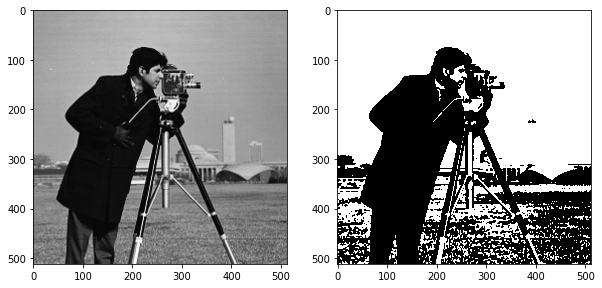

In [17]:
fig , ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(image, cmap = plt.cm.gray)
ax[1].imshow(threshold_image, cmap = plt.cm.gray)

## local Thresholding

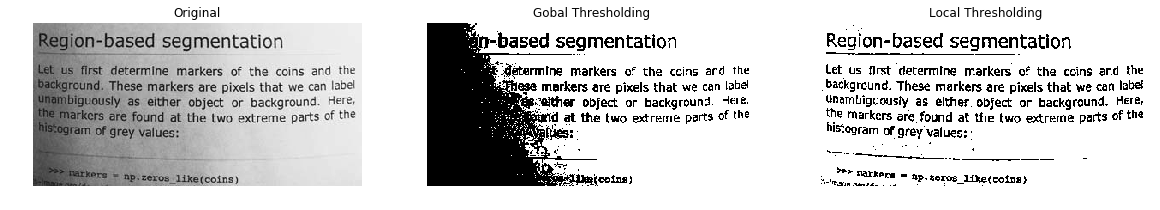

In [21]:
image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh
block_size = 25

adaptive_thresh = threshold_adaptive(image, block_size, offset=10)

fig, ax = plt.subplots(nrows=1,ncols = 3, figsize=(20, 20))


ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(binary_global, cmap = plt.cm.gray)
ax[1].set_title("Gobal Thresholding")


ax[2].imshow(adaptive_thresh, cmap = plt.cm.gray)
ax[2].set_title('Local Thresholding')

for a in ax:
    a.axis('off')

plt.show()

[돌아가기](#section14)

# Using Edge detection for Segmentation

<a id='section4'></a>

In [218]:
from scipy import ndimage as ndi

In [219]:
from skimage.feature import canny

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


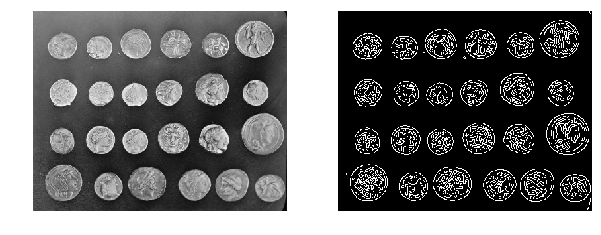

In [220]:
image = data.coins()
edges = canny(image)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))

ax[0].imshow(image, cmap = plt.cm.gray, interpolation = "nearest")
ax[0].set_axis_off()

ax[1].imshow(edges, cmap = plt.cm.gray, interpolation = "nearest")
ax[1].set_axis_off()

(-0.5, 383.5, 302.5, -0.5)

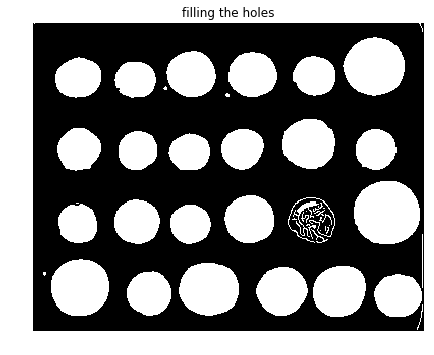

In [221]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('filling the holes')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

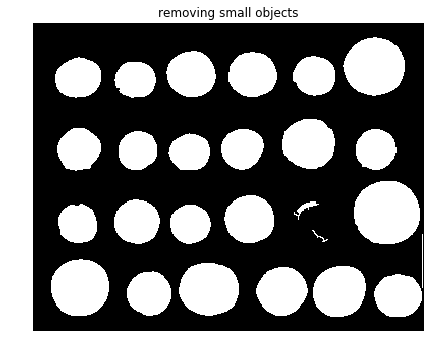

In [222]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('removing small objects')
ax.axis('off')

[돌아가기](#section15)

# Region Growing

<a id='section5'></a>

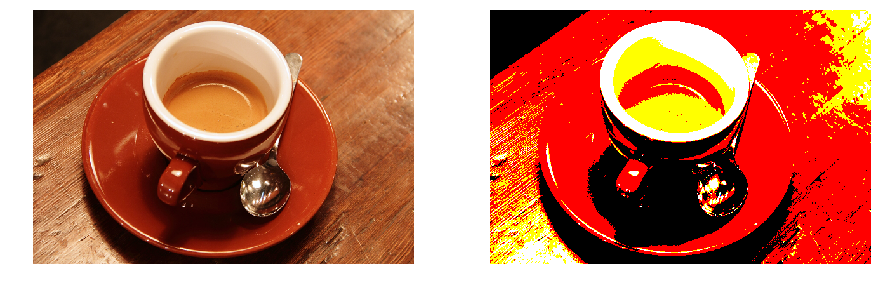

In [223]:
def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1

    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))

    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))

    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    return out

def region_growing(img, seed):
    list = []
    outimg = np.zeros_like(img)
    list.append((seed[0], seed[1]))
    processed = []
    while(len(list) > 0):
        pix = list[0]
        outimg[pix[0], pix[1]] = 255
        for coord in get8n(pix[0], pix[1], img.shape):
            if img[coord[0], coord[1]] != 0:
                outimg[coord[0], coord[1]] = 255
                if not coord in processed:
                    list.append(coord)
                processed.append(coord)
        list.pop(0)
        #cv2.imshow("progress",outimg)
        #cv2.waitKey(1)
    return outimg

def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print( 'Seed: ' + str(x) + ', ' + str(y), img[y,x])
        clicks.append((y,x))

clicks = []
image = data.coffee()
ret, img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
fig , ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (15,15))

ax[0].imshow(image)
ax[1].imshow(img)

for a in ax:
    a.set_axis_off()

[돌아가기](#section16)

# Region Split

<a id='section6'></a>


/opt/conda/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/opt/conda/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/opt/conda/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fu

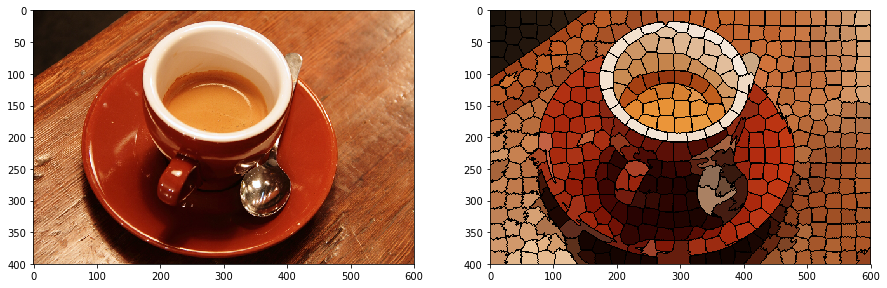

In [224]:
img = data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=400)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)

label_rgb = color.label2rgb(labels, img, kind='avg')
label_rgb = segmentation.mark_boundaries(label_rgb, labels, (0, 0, 0))


fig , ax = plt.subplots(1,2, figsize = (15,15))

ax[0].imshow(img)
ax[1].imshow(label_rgb)


[돌아가기](#section17)

# Watershed Segmentation

<a id='section7'></a>

/opt/conda/lib/python3.6/site-packages/skimage/morphology/watershed.py:151: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_im[[slice(p, -p, None) for p in pads]] = im
/opt/conda/lib/python3.6/site-packages/skimage/morphology/watershed.py:228: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  image.ndim]


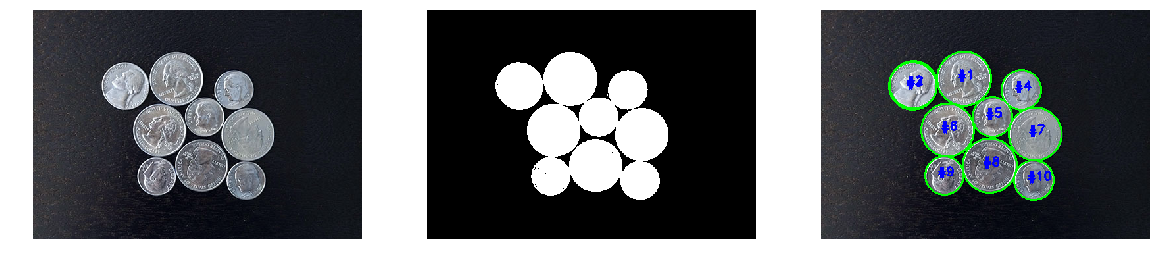

In [16]:
import cv2
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse

image = cv2.imread('coins.jpg')
image1 = np.copy(image)
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
 
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,labels=thresh)


 

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)

for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
 
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
 
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
 
fig , ax = plt.subplots(nrows = 1,ncols = 3, figsize = (20,20))

ax[0].imshow(image1)
ax[1].imshow(thresh, cmap = plt.cm.gray)
ax[2].imshow(image)

for a in ax:
    a.set_axis_off()



[돌아가기](#section18)

# k-means clustering

<a id='section8'></a>

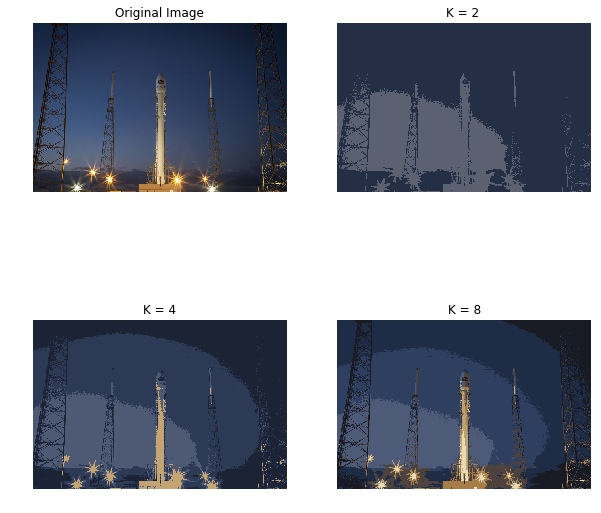

In [230]:
image = data.rocket()
aaa = image.reshape((-1,3))
aaa = np.float32(aaa)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 2
ret,label,center=cv2.kmeans(aaa,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res_1 = center[label.flatten()]
res2_1 = res_1.reshape((image.shape))

k = 4
ret,label,center=cv2.kmeans(aaa,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res_2 = center[label.flatten()]
res2_2 = res_2.reshape((image.shape))

k = 8
ret,label,center=cv2.kmeans(aaa,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res_3 = center[label.flatten()]
res2_3 = res_3.reshape((image.shape))

fig, ax = plt.subplots(2,2 ,figsize = (10,10))

ax[0][0].imshow(image)
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

ax[0][1].imshow(res2_1)
ax[0][1].set_title("K = 2 ")
ax[0][1].axis('off')

ax[1][0].imshow(res2_2)
ax[1][0].set_title("K = 4")
ax[1][0].axis('off')

ax[1][1].imshow(res2_3)
ax[1][1].set_title("K = 8")
ax[1][1].axis('off')

plt.show()

[돌아가기](#section19)

# Meanshift Algorithm

<a id='section9'></a>

(-0.5, 639.5, 426.5, -0.5)

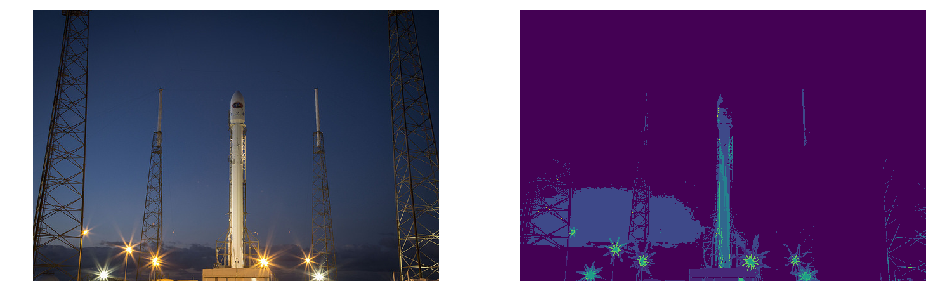

In [231]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12

image = data.rocket()

# Image is (687 x 1025, RGB channels)
image = np.array(image)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_

cluster_centers = ms.cluster_centers_


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')
# https://github.com/log0/build-your-own-meanshift/blob/master/Meanshift%20Image%20Segmentation.ipynb

[돌아가기](#section20)

<a id='section2'></a>

# 이진영상처리

# Erosion

<a id='section10'></a>

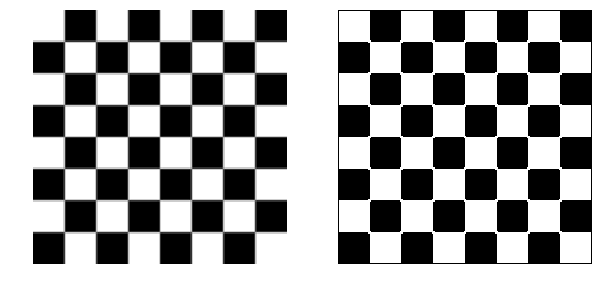

In [232]:
image = data.checkerboard()
fig, ax = plt.subplots(1, 2, figsize = (10,10))

ax[0].imshow(image, plt.cm.gray)
ax[1].imshow(binary_erosion(image), plt.cm.gray)

for a in ax:
    a.set_axis_off()

# Dilation

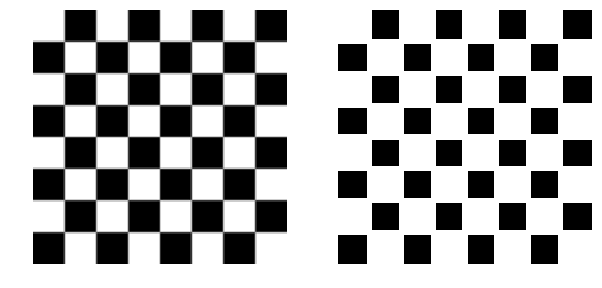

In [233]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))

ax[0].imshow(image, plt.cm.gray)
ax[1].imshow(binary_dilation(image), plt.cm.gray)

for a in ax:
    a.set_axis_off()

[돌아가기](#section21)

# Opening

<a id='section11'></a>

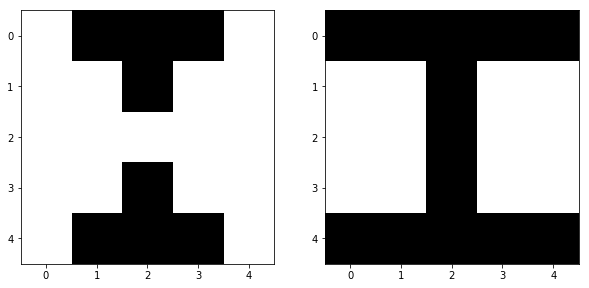

In [234]:
image = np.array([[1, 0, 0, 0, 1],
...                            [1, 1, 0, 1, 1],
...                            [1, 1, 1, 1, 1],
...                            [1, 1, 0, 1, 1],
...                            [1, 0, 0, 0, 1]], dtype=np.uint8)
image1= opening(image, square(3))

fig ,ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(image, cmap = plt.cm.gray)
ax[1].imshow(image1, cmap = plt.cm.gray)


# Closing

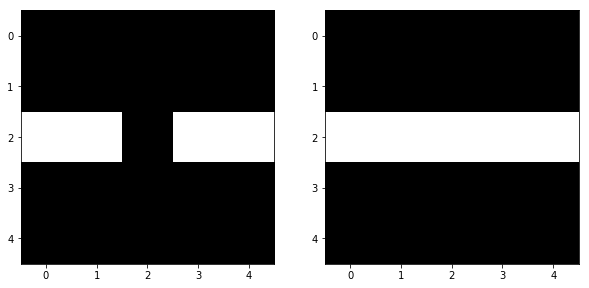

In [235]:
image = np.array([[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[1, 1, 0, 1, 1],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]], dtype=np.uint8)
image1 = closing(image, square(3))

fig ,ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(image, cmap = plt.cm.gray)
ax[1].imshow(image1, cmap = plt.cm.gray)


[돌아가기](#section22)

# Contour

<a id='section12|'></a>

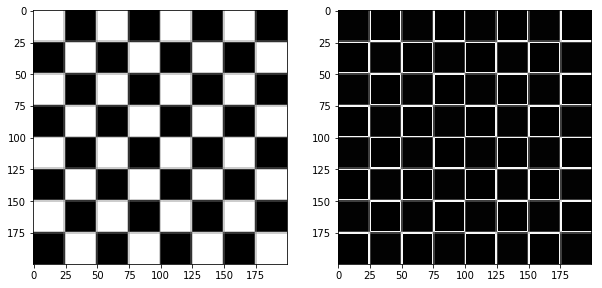

In [236]:
image = data.checkerboard()
image1 = binary_erosion(image)
contour = (image1 -image)/2
fig , ax = plt.subplots(1,2 , figsize = (10,10))

ax[0].imshow(image, cmap = plt.cm.gray)
ax[1].imshow(contour, cmap = plt.cm.gray)

[돌아가기](#section23)

# Skeletonization 

<a id='section13'></a>

In [237]:
image = data.horse()
image = image[:,:,0]

In [238]:
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i][j] >1:
            image[i][j] = 0
            
        else: 
            image[i][j] = 1

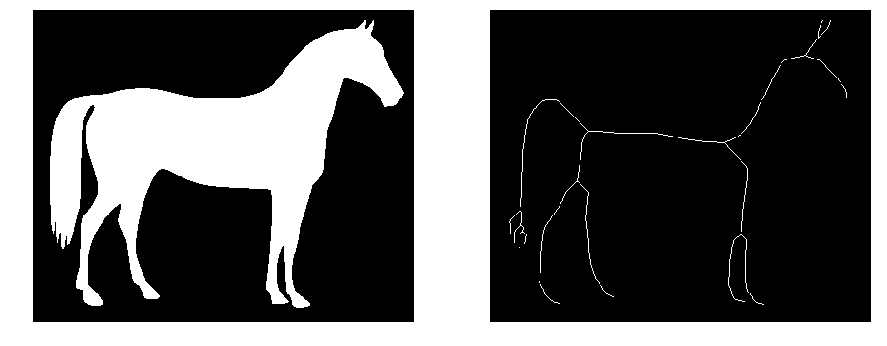

In [239]:
from skimage.morphology import skeletonize

skeleton = skeletonize(image)
fig, ax = plt.subplots(1,2 , figsize=(15, 15))
ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[1].axis('off')

plt.show()


[돌아가기](#section24)